In [90]:

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk import word_tokenize
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [1]:
gardenParty = open('../Readings/content/texts/garden-party.md').read()

In [13]:
gpSents = nltk.sent_tokenize(gardenParty)

In [16]:
[sent for sent in gpSents if sent.isupper()]

['LOST!',
 'THE GARDEN PARTY.',
 'THE DAUGHTERS OF THE LATE COLONEL.',
 '"I\\...',
 'MR. AND MRS. DOVE.',
 'THE YOUNG GIRL.',
 'LIFE OF MA PARKER.',
 'MARRIAGE A LA MODE.',
 'THE VOYAGE.',
 'MISS BRILL.',
 'HER FIRST BALL.',
 'THE SINGING LESSON.',
 'BANK HOLIDAY.',
 'AN IDEAL FAMILY.']

In [25]:
storyTitles = ['At the Bay.',
 'THE GARDEN PARTY.',
 'THE DAUGHTERS OF THE LATE COLONEL.',
 'MR. AND MRS. DOVE.',
 'THE YOUNG GIRL.',
 'LIFE OF MA PARKER.',
 'MARRIAGE A LA MODE.',
 'THE VOYAGE.',
 'MISS BRILL.',
 'HER FIRST BALL.',
 'THE SINGING LESSON.',
 'THE STRANGER',
 'BANK HOLIDAY.',
 'AN IDEAL FAMILY.',
 "The Lady's Maid"]

In [26]:
[gardenParty.index(s) for s in storyTitles]

[459,
 74260,
 104252,
 144622,
 162971,
 174972,
 188686,
 210356,
 227729,
 238583,
 252808,
 264755,
 289665,
 296653,
 310401]

In [68]:
gp = gardenParty[74254:104246]
daughters = gardenParty[104252:144618]
youngGirl = gardenParty[162971:174968]
marriage = gardenParty[188686:210351]
herFirstBall = gardenParty[238583:252800]
anIdealFamily = gardenParty[296653:310397]

# print(anIdealFamily[0:100])
# print(anIdealFamily[-100:])


In [67]:

gpTitles = ['The Garden Party', 'Daughters of the Late Colonel', 'The Young Girl', 'Marriage A La Mode', 'Her First Ball', 'An Ideal Family']
gpTexts = []
gpTexts.append(gp)
gpTexts.append(daughters)
gpTexts.append(youngGirl)
gpTexts.append(marriage)
gpTexts.append(herFirstBall)
gpTexts.append(anIdealFamily)

In [95]:
def plotStylometry(allTexts, allTitles):
    # Set up the vectorizer with parameters
    tfidfVectorizer = TfidfVectorizer(max_features=800, max_df=0.5)
    
    # Actually do the transform, allTexts is a list, so 
    # you end up with a multi-dimensional matrix
    textMatrix = tfidfVectorizer.fit_transform(allTexts)
    
    # Fill in the gaps, else it's a sparse matrix
    # to save space
    denseTextMatrix = textMatrix.todense()
    
    # For debug purposes, what is the shape of the matrix
    print(denseTextMatrix.shape)
    
    # PCA can compress the multi-dimensional matrix
    # to a 2-dimensional (in this case) matrix
    pca = PCA(n_components=2)
    textPoints = pca.fit_transform(denseTextMatrix)
    
    # Create a data frame of this two dimensional table/matrix
    # set index to be the titles and provide it with columns
    textDf = pd.DataFrame(textPoints, index=allTitles, columns=['C1','C2'])
    
    # Do a plot of the data frame - you have to give it the x, y
    ax = textDf.plot(kind='scatter', x='C1', y='C2', figsize=(8,8))

    # Annotate the points with the titles
    for title, points in textDf.iterrows():
        ax.annotate(title, points)
    
    plt.show()  
    
    links = linkage(textDf, method='ward')
    _ = dendrogram(links, labels=allTitles, orientation='left')
    
    plt.show()

(6, 800)


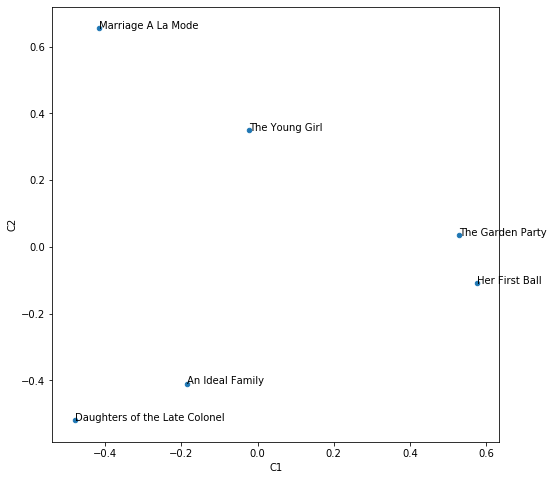

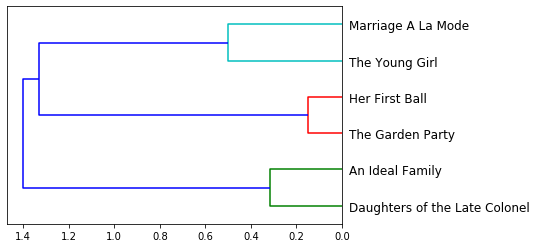

In [96]:
plotStylometry(gpTexts, gpTitles)